In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
heart_Data = pd.read_csv('heart.csv')

In [3]:
heart_Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
heart_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
heart_Data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
heart_Data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_Data['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

In [8]:
heart_Data['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [9]:
heart_Data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [10]:
heart_Data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [11]:
heart_Data['slope'].value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

### Dummies using panda to convert categorical data into one hot encoding

In [12]:
heart_Data = pd.get_dummies(heart_Data,columns=['cp','ca','restecg','thal','slope'])

In [13]:
heart_Data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,restecg_0,restecg_1,restecg_2,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,0,1,...,0,1,0,0,0,0,1,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,1,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,0,0,0,0,1,1,0,0
3,61,1,148,203,0,161,0,0.0,0,1,...,0,1,0,0,0,0,1,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,0,1,0,0,0,1,0,0,1,0


In [14]:
numerical_cols = ["age","trestbps","chol","thalach","oldpeak"]
categorical_cols =  list(set(heart_Data.columns) - set(numerical_cols) - {"target"})

In [15]:
numerical_cols

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
categorical_cols

['ca_3',
 'thal_0',
 'slope_2',
 'slope_1',
 'sex',
 'ca_4',
 'restecg_1',
 'fbs',
 'cp_3',
 'restecg_2',
 'thal_3',
 'slope_0',
 'ca_1',
 'cp_2',
 'thal_1',
 'ca_2',
 'cp_1',
 'cp_0',
 'ca_0',
 'thal_2',
 'exang',
 'restecg_0']

### Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
heart_Data_train , heart_Data_test = train_test_split(heart_Data,test_size=0.2,random_state=42)

In [18]:
heart_Data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 835 to 860
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        820 non-null    int64  
 1   sex        820 non-null    int64  
 2   trestbps   820 non-null    int64  
 3   chol       820 non-null    int64  
 4   fbs        820 non-null    int64  
 5   thalach    820 non-null    int64  
 6   exang      820 non-null    int64  
 7   oldpeak    820 non-null    float64
 8   target     820 non-null    int64  
 9   cp_0       820 non-null    uint8  
 10  cp_1       820 non-null    uint8  
 11  cp_2       820 non-null    uint8  
 12  cp_3       820 non-null    uint8  
 13  ca_0       820 non-null    uint8  
 14  ca_1       820 non-null    uint8  
 15  ca_2       820 non-null    uint8  
 16  ca_3       820 non-null    uint8  
 17  ca_4       820 non-null    uint8  
 18  restecg_0  820 non-null    uint8  
 19  restecg_1  820 non-null    uint8  
 20  restecg_

In [19]:
heart_Data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 527 to 842
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        205 non-null    int64  
 1   sex        205 non-null    int64  
 2   trestbps   205 non-null    int64  
 3   chol       205 non-null    int64  
 4   fbs        205 non-null    int64  
 5   thalach    205 non-null    int64  
 6   exang      205 non-null    int64  
 7   oldpeak    205 non-null    float64
 8   target     205 non-null    int64  
 9   cp_0       205 non-null    uint8  
 10  cp_1       205 non-null    uint8  
 11  cp_2       205 non-null    uint8  
 12  cp_3       205 non-null    uint8  
 13  ca_0       205 non-null    uint8  
 14  ca_1       205 non-null    uint8  
 15  ca_2       205 non-null    uint8  
 16  ca_3       205 non-null    uint8  
 17  ca_4       205 non-null    uint8  
 18  restecg_0  205 non-null    uint8  
 19  restecg_1  205 non-null    uint8  
 20  restecg_

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def get_features_and_targets(heart_Data,numerical_cols,categorical_cols,scaler):
    x_numerical_scaled = scaler.fit_transform(heart_Data[numerical_cols])
    x_categorical = heart_Data[categorical_cols].to_numpy()
    x = np.hstack((x_numerical_scaled,x_categorical))
    y = heart_Data["target"]
    
    return x,y

In [21]:
x_train,y_train = get_features_and_targets(heart_Data_train,numerical_cols,categorical_cols,scaler)
x_test,y_test = get_features_and_targets(heart_Data_test,numerical_cols,categorical_cols,scaler)

### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [23]:
lr_y_predict = lr_model.predict(x_test)
lr_accuracy = accuracy_score(lr_y_predict,y_test)
print("Accuracy : " + str(lr_accuracy*100))
lr_precision_positive = metrics.precision_score(y_test, lr_y_predict, pos_label=1)
print("Precision : " + str(lr_precision_positive*100))
lr_recall_sensitivity = metrics.recall_score(y_test, lr_y_predict, pos_label=1)
print("Recall : " + str(lr_recall_sensitivity*100))
lr_f1_positive = metrics.f1_score(y_test, lr_y_predict, pos_label=1)
print("F-1 Score : " + str(lr_f1_positive*100))
print('\n')
print(metrics.classification_report(y_test, lr_y_predict))

Accuracy : 82.92682926829268
Precision : 78.33333333333333
Recall : 91.2621359223301
F-1 Score : 84.30493273542601


              precision    recall  f1-score   support

           0       0.89      0.75      0.81       102
           1       0.78      0.91      0.84       103

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205



### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
dt_y_predict = dt_model.predict(x_test)

dt_accuracy = accuracy_score(dt_y_predict,y_test)
print("Accuracy : " + str(dt_accuracy*100))

dt_precision_positive = metrics.precision_score(y_test, dt_y_predict, pos_label=1)
print("Precision : " + str(dt_precision_positive*100))

dt_recall_sensitivity = metrics.recall_score(y_test, dt_y_predict, pos_label=1)
print("Recall : " + str(dt_recall_sensitivity*100))

dt_f1_positive = metrics.f1_score(y_test, dt_y_predict, pos_label=1)
print("F-1 Score : " + str(dt_f1_positive*100))

print('\n')
print(metrics.classification_report(y_test, dt_y_predict))

Accuracy : 95.60975609756098
Precision : 94.33962264150944
Recall : 97.0873786407767
F-1 Score : 95.69377990430623


              precision    recall  f1-score   support

           0       0.97      0.94      0.96       102
           1       0.94      0.97      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



### Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [27]:
rf_y_predict = rf_model.predict(x_test)

rf_accuracy = accuracy_score(rf_y_predict,y_test)
print("Accuracy : " + str(rf_accuracy*100))

rf_precision_positive = metrics.precision_score(y_test, rf_y_predict, pos_label=1)
print("Precision : " + str(rf_precision_positive*100))

rf_recall_sensitivity = metrics.recall_score(y_test, rf_y_predict, pos_label=1)
print("Recall : " + str(rf_recall_sensitivity*100))

rf_f1_positive = metrics.f1_score(y_test, rf_y_predict, pos_label=1)
print("F-1 Score : " + str(rf_f1_positive*100))

print('\n')
print(metrics.classification_report(y_test, rf_y_predict))

Accuracy : 98.53658536585365
Precision : 100.0
Recall : 97.0873786407767
F-1 Score : 98.52216748768473


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



### SVM

In [28]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [29]:
svc_y_predict = svc_model.predict(x_test)

svc_accuracy = accuracy_score(svc_y_predict,y_test)
print("Accuracy : " + str(svc_accuracy*100))

svc_precision_positive = metrics.precision_score(y_test, svc_y_predict, pos_label=1)
print("Precision : " + str(svc_precision_positive*100))

svc_recall_sensitivity = metrics.recall_score(y_test, svc_y_predict, pos_label=1)
print("Recall : " + str(svc_recall_sensitivity*100))

svc_f1_positive = metrics.f1_score(y_test, svc_y_predict, pos_label=1)
print("F-1 Score : " + str(svc_f1_positive*100))

print('\n')
print(metrics.classification_report(y_test, svc_y_predict))

Accuracy : 87.3170731707317
Precision : 84.070796460177
Recall : 92.23300970873787
F-1 Score : 87.96296296296296


              precision    recall  f1-score   support

           0       0.91      0.82      0.87       102
           1       0.84      0.92      0.88       103

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205



### GNB

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)

GaussianNB()

In [31]:
gnb_y_predict = gnb_model.predict(x_test)

gnb_accuracy = accuracy_score(gnb_y_predict,y_test)
print("Accuracy : " + str(gnb_accuracy*100))

gnb_precision_positive = metrics.precision_score(y_test, gnb_y_predict, pos_label=1)
print("Precision : " + str(gnb_precision_positive*100))

gnb_recall_sensitivity = metrics.recall_score(y_test, gnb_y_predict, pos_label=1)
print("Recall : " + str(gnb_recall_sensitivity*100))

gnb_f1_positive = metrics.f1_score(y_test, gnb_y_predict, pos_label=1)
print("F-1 Score : " + str(gnb_f1_positive*100))

print('\n')
print(metrics.classification_report(y_test, gnb_y_predict))

Accuracy : 74.63414634146342
Precision : 68.34532374100719
Recall : 92.23300970873787
F-1 Score : 78.51239669421487


              precision    recall  f1-score   support

           0       0.88      0.57      0.69       102
           1       0.68      0.92      0.79       103

    accuracy                           0.75       205
   macro avg       0.78      0.75      0.74       205
weighted avg       0.78      0.75      0.74       205



### KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier  
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
knn_model.fit(x_train, y_train) 

KNeighborsClassifier()

In [33]:
knn_y_predict = knn_model.predict(x_test)

knn_accuracy = accuracy_score(knn_y_predict,y_test)
print("Accuracy : " + str(knn_accuracy*100))

knn_precision_positive = metrics.precision_score(y_test, knn_y_predict, pos_label=1)
print("Precision : " + str(knn_precision_positive*100))

knn_recall_sensitivity = metrics.recall_score(y_test, knn_y_predict, pos_label=1)
print("Recall : " + str(knn_recall_sensitivity*100))

knn_f1_positive = metrics.f1_score(y_test, knn_y_predict, pos_label=1)
print("F-1 Score : " + str(knn_f1_positive*100))

print('\n')
print(metrics.classification_report(y_test, knn_y_predict))

Accuracy : 81.95121951219512
Precision : 77.96610169491525
Recall : 89.32038834951457
F-1 Score : 83.25791855203619


              precision    recall  f1-score   support

           0       0.87      0.75      0.80       102
           1       0.78      0.89      0.83       103

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



In [34]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, lr_y_predict, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, dt_y_predict, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf_y_predict, pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, svc_y_predict, pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gnb_y_predict, pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, knn_y_predict, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [35]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, lr_y_predict)
auc_score2 = roc_auc_score(y_test, dt_y_predict)
auc_score3 = roc_auc_score(y_test, rf_y_predict)
auc_score4 = roc_auc_score(y_test, svc_y_predict)
auc_score5 = roc_auc_score(y_test, gnb_y_predict)
auc_score6 = roc_auc_score(y_test, knn_y_predict)

print(auc_score1, auc_score2)

0.8288596992194937 0.956025128498001


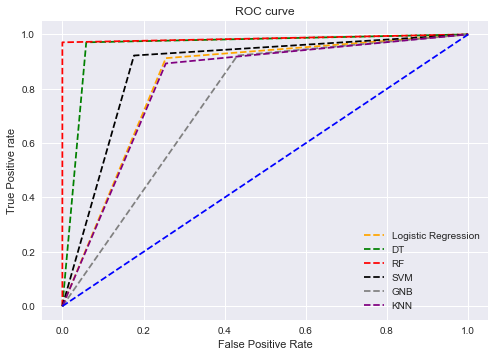

In [36]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='DT')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='RF')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='SVM')
plt.plot(fpr5, tpr5, linestyle='--',color='grey', label='GNB')
plt.plot(fpr6, tpr6, linestyle='--',color='purple', label='KNN')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();